# Part 1: The Reality - "Our Data is a Mess"

---

## Learning Objectives

This notebook demonstrates **Pain Point #1from the course:

> **"Our data is a mess."**

You'll see firsthand:
- Missing values in critical fields
- Inconsistent data types
- Multiple data sources that need merging
- Data quality issues

**The Key Message**: This is what **"Not Ready"looks like. Without proper data preparation, any AI model built on this will fail.

---

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../utils')
from helpers import assess_data_quality, plot_missing_data, set_plot_style

set_plot_style()

print("Libraries loaded successfully")

Libraries loaded successfully


## Load Raw Data

Let's load all the data files without any cleaning. This is what you typically receive from business stakeholders.

In [9]:
DATA_PATH = '../data/raw/'

try:
    train_df = pd.read_csv(DATA_PATH + 'train.csv', parse_dates=['date'])
    test_df = pd.read_csv(DATA_PATH + 'test.csv', parse_dates=['date'])
    stores_df = pd.read_csv(DATA_PATH + 'stores.csv')
    oil_df = pd.read_csv(DATA_PATH + 'oil.csv', parse_dates=['date'])
    holidays_df = pd.read_csv(DATA_PATH + 'holidays_events.csv', parse_dates=['date'])

    print("All data files loaded successfully!\n")
    print(f"Training data: {train_df.shape[0]:,} rows × {train_df.shape[1]} columns")
    print(f"Test data: {test_df.shape[0]:,} rows × {test_df.shape[1]} columns")
    print(f"Stores: {stores_df.shape[0]} stores")
    print(f"Oil prices: {oil_df.shape[0]:,} daily records")
    print(f"Holidays: {holidays_df.shape[0]:,} events")

except FileNotFoundError as e:
    print("Error: Dataset files not found!")
    print(f"Please download the dataset first:")
    print("See DATASET.md for instructions")
    print("\nQuick link: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data")

All data files loaded successfully!

Training data: 3,000,888 rows × 6 columns
Test data: 28,512 rows × 5 columns
Stores: 54 stores
Oil prices: 1,218 daily records
Holidays: 350 events


## Pain Point #1: "Our data is a mess"

Let's examine each dataset and identify the problems...

### Problem 1: Missing Values Everywhere

In [10]:
print("\n" + "="*70)
print("PROBLEM #1: MISSING VALUES")
print("="*70)

print(f"Training Data:")
print(train_df.head(10))

print(f"Let's check for missing values...")
assess_data_quality(train_df, "Training Data")


PROBLEM #1: MISSING VALUES
Training Data:
   id       date  store_nbr        family  sales  onpromotion
0   0 2013-01-01          1    AUTOMOTIVE    0.0            0
1   1 2013-01-01          1     BABY CARE    0.0            0
2   2 2013-01-01          1        BEAUTY    0.0            0
3   3 2013-01-01          1     BEVERAGES    0.0            0
4   4 2013-01-01          1         BOOKS    0.0            0
5   5 2013-01-01          1  BREAD/BAKERY    0.0            0
6   6 2013-01-01          1   CELEBRATION    0.0            0
7   7 2013-01-01          1      CLEANING    0.0            0
8   8 2013-01-01          1         DAIRY    0.0            0
9   9 2013-01-01          1          DELI    0.0            0
Let's check for missing values...

DATA QUALITY ASSESSMENT: Training Data

📊 Dataset Shape: 3,000,888 rows × 6 columns

🔍 Missing Values:
✅ No missing values found

📋 Data Types:
int64             3
datetime64[ns]    1
object            1
float64           1
Name: count, dty

,Missing Count,Percentage


Oil Price Data:
         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20
5  2013-01-08       93.21
6  2013-01-09       93.08
7  2013-01-10       93.81
8  2013-01-11       93.60
9  2013-01-14       94.27
10 2013-01-15       93.26
11 2013-01-16       94.28
12 2013-01-17       95.49
13 2013-01-18       95.61
14 2013-01-21         NaN

DATA QUALITY ASSESSMENT: Oil Price Data

📊 Dataset Shape: 1,218 rows × 2 columns

🔍 Missing Values:
            Missing Count  Percentage
dcoilwtico             43    3.530378

📋 Data Types:
datetime64[ns]    1
float64           1
Name: count, dtype: int64

🔢 Numeric Columns: ['dcoilwtico']
📝 Categorical Columns: []

🔄 Duplicate Rows: 0




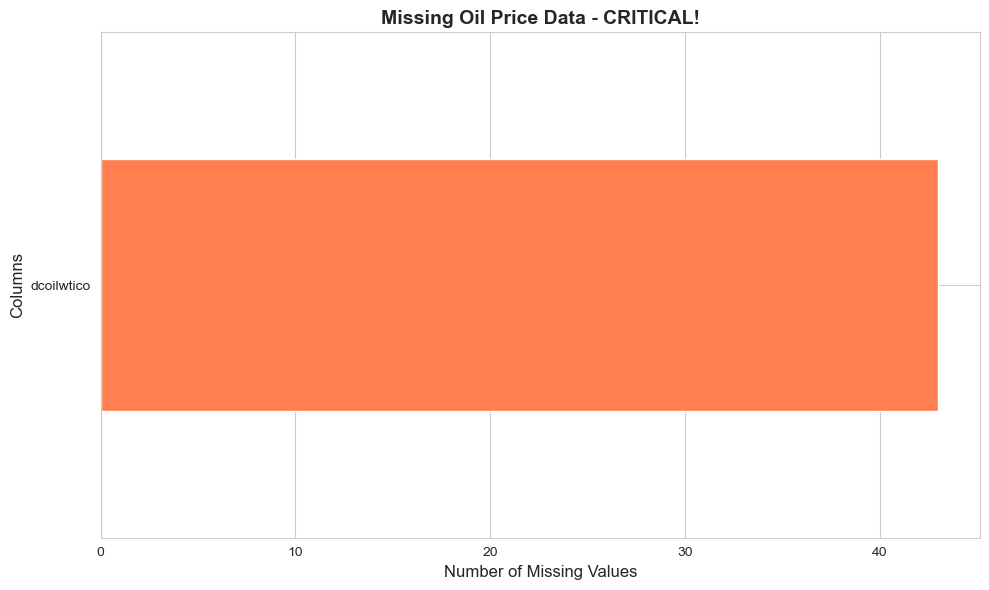

In [11]:
print(f"Oil Price Data:")
print(oil_df.head(15))

assess_data_quality(oil_df, "Oil Price Data")

plot_missing_data(oil_df, "Missing Oil Price Data - CRITICAL!")

#### **Why This is a Problem**

- Oil prices are missing on **weekends and holidays**
- Ecuador's economy is oil-dependent - this affects consumer spending
- Can't just delete these rows - we'd lose critical sales data
- Can't use zero - that's incorrect and will mislead our models

**Question**: How should we handle this? We'll solve it in Part 2.

### Problem 2: Multiple Disconnected Data Sources

In [12]:
print("\n" + "="*70)
print("PROBLEM #2: SCATTERED DATA ACROSS MULTIPLE FILES")
print("="*70)

print(f"Store Information:")
print(stores_df)

print(f"Holidays and Events:")
print(holidays_df.head(15))

print(f"The Problem:")
print("- Sales data is in one file")
print("- Store details are in another")
print("- Oil prices are separate")
print("- Holidays are in yet another file")
print(f"We need to merge all these intelligently...")


PROBLEM #2: SCATTERED DATA ACROSS MULTIPLE FILES
Store Information:
    store_nbr           city                           state type  cluster
0           1          Quito                       Pichincha    D       13
1           2          Quito                       Pichincha    D       13
2           3          Quito                       Pichincha    D        8
3           4          Quito                       Pichincha    D        9
4           5  Santo Domingo  Santo Domingo de los Tsachilas    D        4
5           6          Quito                       Pichincha    D       13
6           7          Quito                       Pichincha    D        8
7           8          Quito                       Pichincha    D        8
8           9          Quito                       Pichincha    B        6
9          10          Quito                       Pichincha    C       15
10         11        Cayambe                       Pichincha    B        6
11         12      Latacunga   

### Problem 3: Inconsistent Data Types and Formats

In [13]:
print("\n" + "="*70)
print("PROBLEM #3: INCONSISTENT DATA TYPES")
print("="*70)

print(f"Training Data Types:")
print(train_df.dtypes)

print(f"Issues:")
print("- 'onpromotion' field is NUMERIC but represents COUNT of promoted items")
print("- Date formats need validation")
print("- Categorical variables stored as strings (inefficient)")
print("- Store and product family should be categories, not objects")


PROBLEM #3: INCONSISTENT DATA TYPES
Training Data Types:
id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object
Issues:
- 'onpromotion' field is NUMERIC but represents COUNT of promoted items
- Date formats need validation
- Categorical variables stored as strings (inefficient)
- Store and product family should be categories, not objects


### Problem 4: Data Distribution and Outliers


PROBLEM #4: STRANGE DATA PATTERNS
Sales Distribution:
count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64


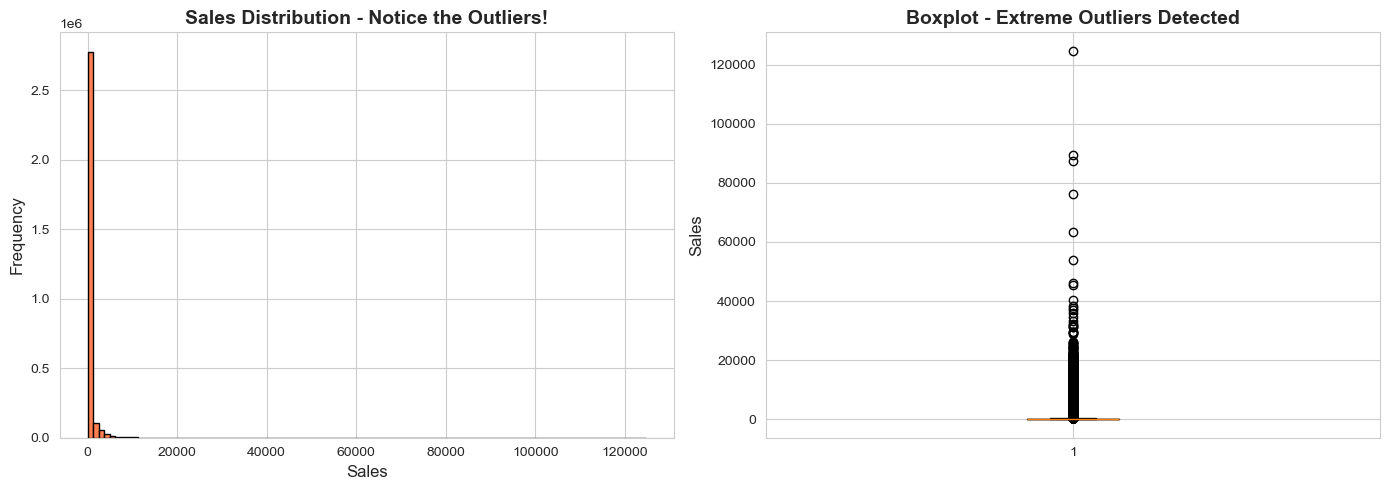

Problems:
- 939,130 records with ZERO sales (31.3%)
- Extreme outliers (holidays? special events? data errors?)
- Highly skewed distribution
Question: Are zero sales real, or missing data coded as zero?


In [14]:
print("\n" + "="*70)
print("PROBLEM #4: STRANGE DATA PATTERNS")
print("="*70)

print(f"Sales Distribution:")
print(train_df['sales'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(train_df['sales'], bins=100, color='coral', edgecolor='black')
axes[0].set_title('Sales Distribution - Notice the Outliers!', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')

axes[1].boxplot(train_df['sales'])
axes[1].set_title('Boxplot - Extreme Outliers Detected', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Sales')

plt.tight_layout()
plt.show()

print(f"Problems:")
zero_sales = (train_df['sales'] == 0).sum()
print(f"- {zero_sales:,} records with ZERO sales ({zero_sales/len(train_df)*100:.1f}%)")
print("- Extreme outliers (holidays? special events? data errors?)")
print("- Highly skewed distribution")
print(f"Question: Are zero sales real, or missing data coded as zero?")

### Problem 5: Time Series Complications


PROBLEM #5: TIME SERIES CHALLENGES
Date Range:
Start: 2013-01-01 00:00:00
End: 2017-08-15 00:00:00
Span: 1687 days


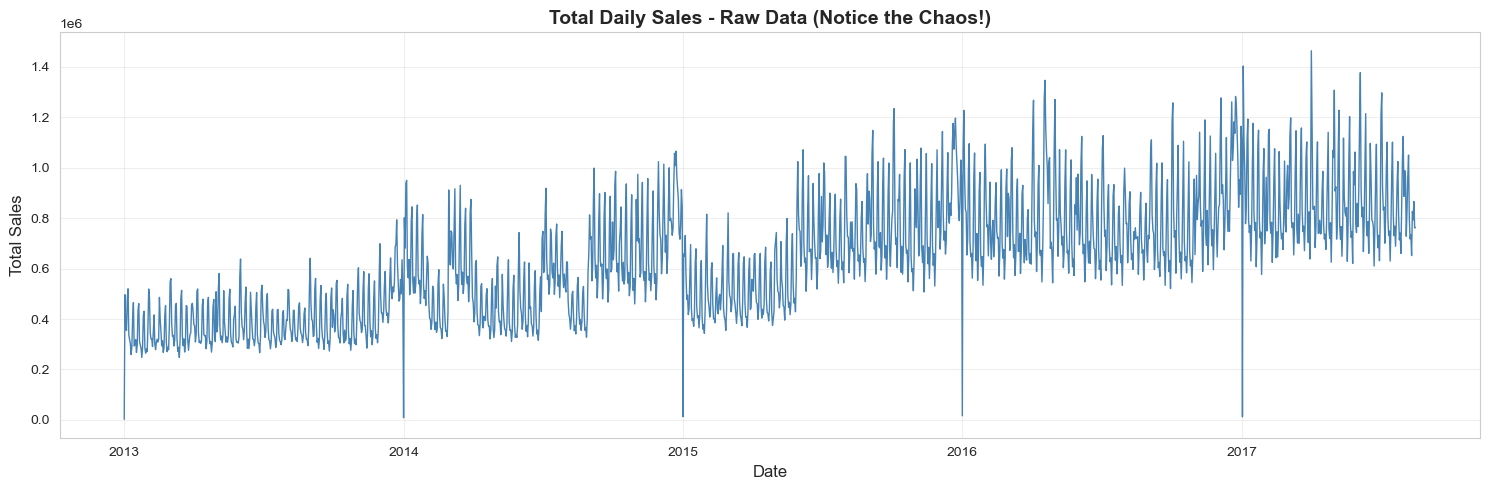

Problems:
- Irregular patterns and spikes
- Seasonality not immediately clear
- Store closures? Holidays? Earthquakes? (Ecuador 2016)
- Different stores have different patterns
- Multiple product families with different behaviors


In [15]:
print("\n" + "="*70)
print("PROBLEM #5: TIME SERIES CHALLENGES")
print("="*70)

print(f"Date Range:")
print(f"Start: {train_df['date'].min()}")
print(f"End: {train_df['date'].max()}")
print(f"Span: {(train_df['date'].max() - train_df['date'].min()).days} days")

daily_sales = train_df.groupby('date')['sales'].sum().reset_index()

plt.figure(figsize=(15, 5))
plt.plot(daily_sales['date'], daily_sales['sales'], linewidth=1, color='steelblue')
plt.title('Total Daily Sales - Raw Data (Notice the Chaos!)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Problems:")
print("- Irregular patterns and spikes")
print("- Seasonality not immediately clear")
print("- Store closures? Holidays? Earthquakes? (Ecuador 2016)")
print("- Different stores have different patterns")
print("- Multiple product families with different behaviors")

## Summary: The Reality Check

### What We Found ("Not Ready" State):

| Problem | Impact | Can We Use This for AI? |
|---------|--------|------------------------|
| **Missing Values** | Critical features incomplete | NO |
| **Scattered Data** | Can't see relationships | NO |
| **Wrong Data Types** | Inefficient processing | NO |
| **Outliers & Zeros** | Will mislead models | NO |
| **Time Series Chaos** | Can't identify patterns | NO |

---

## The Key Insight

> **"Garbage In, Garbage Out"**

If we tried to build an AI model on this data **right now**:
- The model would crash or produce nonsense
- We'd waste time debugging bad predictions
- Business stakeholders would lose trust
- The AI initiative would be labeled a "failure"

**This is why 85% of AI projects fail.**

---

## Next Step: Getting "Ready"

In **Part 2**, we'll transform this mess into clean, analysis-ready data:
- Handle missing values strategically
- Merge data sources intelligently
- Fix data types and formats
- Address outliers and zeros
- Prepare for time series analysis

**This is where the real work begins. This is what separates those who use AI from those who master it.**

---

### Reflection Questions

1. Which data quality issue would cause the biggest problem for sales forecasting?
2. How would you explain these data issues to a non-technical business stakeholder?
3. What additional information would you request from the business team?

**Continue to Part 2: Data Cleaning & Preparation →**